In [42]:
# Let's import the necessary libraries

import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

from munkres import Munkres
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


# Flats_Data


In [43]:
# Loading the flats_dataset

flats_df = pd.read_csv("flats_v2.csv")
flats_df.head()


,FloorNo,FlatNo,Typology,NoOfParkings,Time_To_Podium_1,Time_To_Podium_2,Time_To_Podium_3,Time_To_Podium_4,Time_To_Podium_5,Time_To_Podium_6,Time_To_Podium_7,Time_To_Podium_8,Time_To_Podium_9
0,14,C-1401,3BHK,2,26,24,22,20,18,16,14,12,10
1,14,C-1402,3BHK,2,26,24,22,20,18,16,14,12,10
2,14,C-1403,3BHK,2,26,24,22,20,18,16,14,12,10
3,14,C-1404,4BHK,3,26,24,22,20,18,16,14,12,10
4,15,C-1501,3BHK,2,28,26,24,22,20,18,16,14,12


In [44]:
# Print the shape of the flats_df
print(flats_df.shape)

(208, 13)


In [45]:
# Details about the flats_df
flats_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   FloorNo           208 non-null    int64 
 1   FlatNo            208 non-null    object
 2   Typology          208 non-null    object
 3   NoOfParkings      208 non-null    int64 
 4   Time_To_Podium_1  208 non-null    int64 
 5   Time_To_Podium_2  208 non-null    int64 
 6   Time_To_Podium_3  208 non-null    int64 
 7   Time_To_Podium_4  208 non-null    int64 
 8   Time_To_Podium_5  208 non-null    int64 
 9   Time_To_Podium_6  208 non-null    int64 
 10  Time_To_Podium_7  208 non-null    int64 
 11  Time_To_Podium_8  208 non-null    int64 
 12  Time_To_Podium_9  208 non-null    int64 
dtypes: int64(11), object(2)
memory usage: 21.2+ KB


In [46]:
# Check how many parkings need to be assigned
print(f"Total {flats_df['NoOfParkings'].sum()} parkings need to be assigned")

Total 468 parkings need to be assigned


In [47]:
# let's create a duplicate record for each flats no of parkings

new_flats_data = flats_df.loc[flats_df.index.repeat(flats_df['NoOfParkings'])].reset_index(drop=True)
print(new_flats_data.shape)
new_flats_data.head()

(468, 13)


,FloorNo,FlatNo,Typology,NoOfParkings,Time_To_Podium_1,Time_To_Podium_2,Time_To_Podium_3,Time_To_Podium_4,Time_To_Podium_5,Time_To_Podium_6,Time_To_Podium_7,Time_To_Podium_8,Time_To_Podium_9
0,14,C-1401,3BHK,2,26,24,22,20,18,16,14,12,10
1,14,C-1401,3BHK,2,26,24,22,20,18,16,14,12,10
2,14,C-1402,3BHK,2,26,24,22,20,18,16,14,12,10
3,14,C-1402,3BHK,2,26,24,22,20,18,16,14,12,10
4,14,C-1403,3BHK,2,26,24,22,20,18,16,14,12,10


In [48]:
# Create a new column 'Rank' based on the count of each value in 'Column1'
new_flats_data['Rank'] = new_flats_data.groupby('FlatNo').cumcount() + 1

# Display the DataFrame
new_flats_data.head()

,FloorNo,FlatNo,Typology,NoOfParkings,Time_To_Podium_1,Time_To_Podium_2,Time_To_Podium_3,Time_To_Podium_4,Time_To_Podium_5,Time_To_Podium_6,Time_To_Podium_7,Time_To_Podium_8,Time_To_Podium_9,Rank
0,14,C-1401,3BHK,2,26,24,22,20,18,16,14,12,10,1
1,14,C-1401,3BHK,2,26,24,22,20,18,16,14,12,10,2
2,14,C-1402,3BHK,2,26,24,22,20,18,16,14,12,10,1
3,14,C-1402,3BHK,2,26,24,22,20,18,16,14,12,10,2
4,14,C-1403,3BHK,2,26,24,22,20,18,16,14,12,10,1


In [49]:
# Let's create unique flat_numbers
new_flats_data['unique_flat_no'] = new_flats_data['Rank'].astype(str) + "-" + new_flats_data['FlatNo']
new_flats_data.head()

,FloorNo,FlatNo,Typology,NoOfParkings,Time_To_Podium_1,Time_To_Podium_2,Time_To_Podium_3,Time_To_Podium_4,Time_To_Podium_5,Time_To_Podium_6,Time_To_Podium_7,Time_To_Podium_8,Time_To_Podium_9,Rank,unique_flat_no
0,14,C-1401,3BHK,2,26,24,22,20,18,16,14,12,10,1,1-C-1401
1,14,C-1401,3BHK,2,26,24,22,20,18,16,14,12,10,2,2-C-1401
2,14,C-1402,3BHK,2,26,24,22,20,18,16,14,12,10,1,1-C-1402
3,14,C-1402,3BHK,2,26,24,22,20,18,16,14,12,10,2,2-C-1402
4,14,C-1403,3BHK,2,26,24,22,20,18,16,14,12,10,1,1-C-1403


In [50]:
# Let's drop the columns = ['FlatNo','Typology','FloorNo','NoOfParkings']
new_flats_data = new_flats_data.drop(columns=['FlatNo','Typology','FloorNo','NoOfParkings'])
new_flats_data.head()

,Time_To_Podium_1,Time_To_Podium_2,Time_To_Podium_3,Time_To_Podium_4,Time_To_Podium_5,Time_To_Podium_6,Time_To_Podium_7,Time_To_Podium_8,Time_To_Podium_9,Rank,unique_flat_no
0,26,24,22,20,18,16,14,12,10,1,1-C-1401
1,26,24,22,20,18,16,14,12,10,2,2-C-1401
2,26,24,22,20,18,16,14,12,10,1,1-C-1402
3,26,24,22,20,18,16,14,12,10,2,2-C-1402
4,26,24,22,20,18,16,14,12,10,1,1-C-1403


In [51]:
# Let's add the key column for merging the data
new_flats_data['key'] = 1
new_flats_data.head()

,Time_To_Podium_1,Time_To_Podium_2,Time_To_Podium_3,Time_To_Podium_4,Time_To_Podium_5,Time_To_Podium_6,Time_To_Podium_7,Time_To_Podium_8,Time_To_Podium_9,Rank,unique_flat_no,key
0,26,24,22,20,18,16,14,12,10,1,1-C-1401,1
1,26,24,22,20,18,16,14,12,10,2,2-C-1401,1
2,26,24,22,20,18,16,14,12,10,1,1-C-1402,1
3,26,24,22,20,18,16,14,12,10,2,2-C-1402,1
4,26,24,22,20,18,16,14,12,10,1,1-C-1403,1


In [52]:
cols_to_modify = []
 
for col in new_flats_data.columns[:-2]:
    cols_to_modify.append(col)
    
cols_to_modify

['Time_To_Podium_1',
 'Time_To_Podium_2',
 'Time_To_Podium_3',
 'Time_To_Podium_4',
 'Time_To_Podium_5',
 'Time_To_Podium_6',
 'Time_To_Podium_7',
 'Time_To_Podium_8',
 'Time_To_Podium_9',
 'Rank']

## Parkings


In [53]:
# Let read the parking data
parking_data = pd.read_csv('parking_data_v2.csv')
parking_data.head()

,Podium,ParkingNo,Parking Slot,TravelTimeToLobby,TravelTimeToExitGate
0,Podium 2,1,Podium 2-1,10,45
1,Podium 2,2,Podium 2-2,10,45
2,Podium 2,3,Podium 2-3,10,45
3,Podium 2,4,Podium 2-4,10,45
4,Podium 2,5,Podium 2-5,10,45


In [54]:
parking_data['TotalTime'] = parking_data['TravelTimeToExitGate'] + parking_data['TravelTimeToLobby']
parking_data.head()

,Podium,ParkingNo,Parking Slot,TravelTimeToLobby,TravelTimeToExitGate,TotalTime
0,Podium 2,1,Podium 2-1,10,45,55
1,Podium 2,2,Podium 2-2,10,45,55
2,Podium 2,3,Podium 2-3,10,45,55
3,Podium 2,4,Podium 2-4,10,45,55
4,Podium 2,5,Podium 2-5,10,45,55


In [55]:
#Let's drop the columns TravelTimeToLobby, TravelTimeToExitGate,Podium

parking_data = parking_data.drop(columns=['TravelTimeToLobby','TravelTimeToExitGate','Podium','ParkingNo'])
parking_data.head()

,Parking Slot,TotalTime
0,Podium 2-1,55
1,Podium 2-2,55
2,Podium 2-3,55
3,Podium 2-4,55
4,Podium 2-5,55


In [56]:
# Let's replace the space with underscore in parking slot column

parking_data['Parking Slot'] = parking_data['Parking Slot'].str.replace(' ',"_")
parking_data.head()

,Parking Slot,TotalTime
0,Podium_2-1,55
1,Podium_2-2,55
2,Podium_2-3,55
3,Podium_2-4,55
4,Podium_2-5,55


In [57]:
# Details about the parking dataset
parking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Parking Slot  801 non-null    object
 1   TotalTime     801 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 12.6+ KB


In [58]:
# Transposing the dataframe to convert into matrix
parking_data_transpose = pd.DataFrame(parking_data.transpose()).reset_index()
parking_data_transpose.columns = parking_data_transpose.iloc[0]
parking_data_transpose.head()

,Parking Slot,Podium_2-1,Podium_2-2,Podium_2-3,Podium_2-4,Podium_2-5,Podium_2-6,Podium_2-7,Podium_2-8,Podium_2-9,Podium_2-10,Podium_2-11,Podium_2-12,Podium_2-13,Podium_2-14,Podium_2-15,Podium_2-16,Podium_2-17,Podium_2-18,Podium_2-19,Podium_2-20,Podium_2-21,Podium_2-22,Podium_2-23,Podium_2-24,Podium_2-25,Podium_2-26,Podium_2-27,Podium_2-28,Podium_2-29,Podium_2-30,Podium_2-31,Podium_2-32,Podium_2-33,Podium_2-34,Podium_2-35,Podium_2-36,Podium_2-37,Podium_2-38,Podium_2-39,Podium_2-40,Podium_2-41,Podium_2-42,Podium_2-43,Podium_2-44,Podium_2-45,Podium_2-46,Podium_2-47,Podium_2-48,Podium_2-49,Podium_2-50,Podium_2-51,Podium_2-52,Podium_2-53,Podium_2-54,Podium_2-55,Podium_2-56,Podium_2-57,Podium_2-58,Podium_2-59,Podium_2-60,Podium_2-61,Podium_2-62,Podium_2-63,Podium_2-64,Podium_2-65,Podium_2-66,Podium_2-67,Podium_2-68,Podium_2-69,Podium_2-70,Podium_2-71,Podium_2-72,Podium_2-73,Podium_2-74,Podium_2-75,Podium_2-76,Podium_2-77,Podium_2-78,Podium_2-79,Podium_2-80,Podium_2-81,Podium_2-82,Podium_2-83,Podium_2-84,Podium_2-85,Podium_2-86,Podium_2-87,Podium_2-88,Podium_2-89,Podium_4-1,Podium_4-2,Podium_4-3,Podium_4-4,Podium_4-5,Podium_4-6,Podium_4-7,Podium_4-8,Podium_4-9,Podium_4-10,Podium_4-11,Podium_4-12,Podium_4-13,Podium_4-14,Podium_4-15,Podium_4-16,Podium_4-17,Podium_4-18,Podium_4-19,Podium_4-20,Podium_4-21,Podium_4-22,Podium_4-23,Podium_4-24,Podium_4-25,Podium_4-26,Podium_4-27,Podium_4-28,Podium_4-29,Podium_4-30,Podium_4-31,Podium_4-32,Podium_4-33,Podium_4-34,Podium_4-35,Podium_4-36,Podium_4-37,Podium_4-38,Podium_4-39,Podium_4-40,Podium_4-41,Podium_4-42,Podium_4-43,Podium_4-44,Podium_4-45,Podium_4-46,Podium_4-47,Podium_4-48,Podium_4-49,Podium_4-50,Podium_4-51,Podium_4-52,Podium_4-53,Podium_4-54,Podium_4-55,Podium_4-56,Podium_4-57,Podium_4-58,Podium_4-59,Podium_4-60,Podium_4-61,Podium_4-62,Podium_4-63,Podium_4-64,Podium_4-65,Podium_4-66,Podium_4-67,Podium_4-68,Podium_4-69,Podium_4-70,Podium_4-71,Podium_4-72,Podium_4-73,Podium_4-74,Podium_4-75,Podium_4-76,Podium_4-77,Podium_4-78,Podium_4-79,Podium_4-80,Podium_4-81,Podium_4-82,Podium_4-83,Podium_4-84,Podium_4-85,Podium_4-86,Podium_4-87,Podium_4-88,Podium_4-89,Podium_5-1,Podium_5-2,Podium_5-3,Podium_5-4,Podium_5-5,Podium_5-6,Podium_5-7,Podium_5-8,Podium_5-9,Podium_5-10,Podium_5-11,Podium_5-12,Podium_5-13,Podium_5-14,Podium_5-15,Podium_5-16,Podium_5-17,Podium_5-18,Podium_5-19,Podium_5-20,Podium_5-21,Podium_5-22,Podium_5-23,Podium_5-24,Podium_5-25,Podium_5-26,Podium_5-27,Podium_5-28,Podium_5-29,Podium_5-30,Podium_5-31,Podium_5-32,Podium_5-33,Podium_5-34,Podium_5-35,Podium_5-36,Podium_5-37,Podium_5-38,Podium_5-39,Podium_5-40,Podium_5-41,Podium_5-42,Podium_5-43,Podium_5-44,Podium_5-45,Podium_5-46,Podium_5-47,Podium_5-48,Podium_5-49,Podium_5-50,Podium_5-51,Podium_5-52,Podium_5-53,Podium_5-54,Podium_5-55,Podium_5-56,Podium_5-57,Podium_5-58,Podium_5-59,Podium_5-60,Podium_5-61,Podium_5-62,Podium_5-63,Podium_5-64,Podium_5-65,Podium_5-66,Podium_5-67,Podium_5-68,Podium_5-69,Podium_5-70,Podium_5-71,Podium_5-72,Podium_5-73,Podium_5-74,Podium_5-75,Podium_5-76,Podium_5-77,Podium_5-78,Podium_5-79,Podium_5-80,Podium_5-81,Podium_5-82,Podium_5-83,Podium_5-84,Podium_5-85,Podium_5-86,Podium_5-87,Podium_5-88,Podium_5-89,Podium_6-1,Podium_6-2,Podium_6-3,Podium_6-4,Podium_6-5,Podium_6-6,Podium_6-7,Podium_6-8,Podium_6-9,Podium_6-10,Podium_6-11,Podium_6-12,Podium_6-13,Podium_6-14,Podium_6-15,Podium_6-16,Podium_6-17,Podium_6-18,Podium_6-19,Podium_6-20,Podium_6-21,Podium_6-22,Podium_6-23,Podium_6-24,Podium_6-25,Podium_6-26,Podium_6-27,Podium_6-28,Podium_6-29,Podium_6-30,Podium_6-31,Podium_6-32,Podium_6-33,Podium_6-34,Podium_6-35,Podium_6-36,Podium_6-37,Podium_6-38,Podium_6-39,Podium_6-40,Podium_6-41,Podium_6-42,Podium_6-43,Podium_6-44,Podium_6-45,Podium_6-46,Podium_6-47,Podium_6-48,Podium_6-49,Podium_6-50,Podium_6-51,Podium_6-52,Podium_6-53,Podium_6-54,Podium_6-55,Podium_6-56,Podium_6-57,Podium_6-58,Podium_6-59,Podium_6-60,Podium_6-61,Podium_6-62,Podium_6-63,Podium_6-64,Podium_6-65,Podium_6-66,Podium_6-67,Podium_6-68,Po

In [59]:
#Let's drop the first row, as it is now redundant
parking_data_transpose = parking_data_transpose.iloc[1:,:]
parking_data_transpose


,Parking Slot,Podium_2-1,Podium_2-2,Podium_2-3,Podium_2-4,Podium_2-5,Podium_2-6,Podium_2-7,Podium_2-8,Podium_2-9,Podium_2-10,Podium_2-11,Podium_2-12,Podium_2-13,Podium_2-14,Podium_2-15,Podium_2-16,Podium_2-17,Podium_2-18,Podium_2-19,Podium_2-20,Podium_2-21,Podium_2-22,Podium_2-23,Podium_2-24,Podium_2-25,Podium_2-26,Podium_2-27,Podium_2-28,Podium_2-29,Podium_2-30,Podium_2-31,Podium_2-32,Podium_2-33,Podium_2-34,Podium_2-35,Podium_2-36,Podium_2-37,Podium_2-38,Podium_2-39,Podium_2-40,Podium_2-41,Podium_2-42,Podium_2-43,Podium_2-44,Podium_2-45,Podium_2-46,Podium_2-47,Podium_2-48,Podium_2-49,Podium_2-50,Podium_2-51,Podium_2-52,Podium_2-53,Podium_2-54,Podium_2-55,Podium_2-56,Podium_2-57,Podium_2-58,Podium_2-59,Podium_2-60,Podium_2-61,Podium_2-62,Podium_2-63,Podium_2-64,Podium_2-65,Podium_2-66,Podium_2-67,Podium_2-68,Podium_2-69,Podium_2-70,Podium_2-71,Podium_2-72,Podium_2-73,Podium_2-74,Podium_2-75,Podium_2-76,Podium_2-77,Podium_2-78,Podium_2-79,Podium_2-80,Podium_2-81,Podium_2-82,Podium_2-83,Podium_2-84,Podium_2-85,Podium_2-86,Podium_2-87,Podium_2-88,Podium_2-89,Podium_4-1,Podium_4-2,Podium_4-3,Podium_4-4,Podium_4-5,Podium_4-6,Podium_4-7,Podium_4-8,Podium_4-9,Podium_4-10,Podium_4-11,Podium_4-12,Podium_4-13,Podium_4-14,Podium_4-15,Podium_4-16,Podium_4-17,Podium_4-18,Podium_4-19,Podium_4-20,Podium_4-21,Podium_4-22,Podium_4-23,Podium_4-24,Podium_4-25,Podium_4-26,Podium_4-27,Podium_4-28,Podium_4-29,Podium_4-30,Podium_4-31,Podium_4-32,Podium_4-33,Podium_4-34,Podium_4-35,Podium_4-36,Podium_4-37,Podium_4-38,Podium_4-39,Podium_4-40,Podium_4-41,Podium_4-42,Podium_4-43,Podium_4-44,Podium_4-45,Podium_4-46,Podium_4-47,Podium_4-48,Podium_4-49,Podium_4-50,Podium_4-51,Podium_4-52,Podium_4-53,Podium_4-54,Podium_4-55,Podium_4-56,Podium_4-57,Podium_4-58,Podium_4-59,Podium_4-60,Podium_4-61,Podium_4-62,Podium_4-63,Podium_4-64,Podium_4-65,Podium_4-66,Podium_4-67,Podium_4-68,Podium_4-69,Podium_4-70,Podium_4-71,Podium_4-72,Podium_4-73,Podium_4-74,Podium_4-75,Podium_4-76,Podium_4-77,Podium_4-78,Podium_4-79,Podium_4-80,Podium_4-81,Podium_4-82,Podium_4-83,Podium_4-84,Podium_4-85,Podium_4-86,Podium_4-87,Podium_4-88,Podium_4-89,Podium_5-1,Podium_5-2,Podium_5-3,Podium_5-4,Podium_5-5,Podium_5-6,Podium_5-7,Podium_5-8,Podium_5-9,Podium_5-10,Podium_5-11,Podium_5-12,Podium_5-13,Podium_5-14,Podium_5-15,Podium_5-16,Podium_5-17,Podium_5-18,Podium_5-19,Podium_5-20,Podium_5-21,Podium_5-22,Podium_5-23,Podium_5-24,Podium_5-25,Podium_5-26,Podium_5-27,Podium_5-28,Podium_5-29,Podium_5-30,Podium_5-31,Podium_5-32,Podium_5-33,Podium_5-34,Podium_5-35,Podium_5-36,Podium_5-37,Podium_5-38,Podium_5-39,Podium_5-40,Podium_5-41,Podium_5-42,Podium_5-43,Podium_5-44,Podium_5-45,Podium_5-46,Podium_5-47,Podium_5-48,Podium_5-49,Podium_5-50,Podium_5-51,Podium_5-52,Podium_5-53,Podium_5-54,Podium_5-55,Podium_5-56,Podium_5-57,Podium_5-58,Podium_5-59,Podium_5-60,Podium_5-61,Podium_5-62,Podium_5-63,Podium_5-64,Podium_5-65,Podium_5-66,Podium_5-67,Podium_5-68,Podium_5-69,Podium_5-70,Podium_5-71,Podium_5-72,Podium_5-73,Podium_5-74,Podium_5-75,Podium_5-76,Podium_5-77,Podium_5-78,Podium_5-79,Podium_5-80,Podium_5-81,Podium_5-82,Podium_5-83,Podium_5-84,Podium_5-85,Podium_5-86,Podium_5-87,Podium_5-88,Podium_5-89,Podium_6-1,Podium_6-2,Podium_6-3,Podium_6-4,Podium_6-5,Podium_6-6,Podium_6-7,Podium_6-8,Podium_6-9,Podium_6-10,Podium_6-11,Podium_6-12,Podium_6-13,Podium_6-14,Podium_6-15,Podium_6-16,Podium_6-17,Podium_6-18,Podium_6-19,Podium_6-20,Podium_6-21,Podium_6-22,Podium_6-23,Podium_6-24,Podium_6-25,Podium_6-26,Podium_6-27,Podium_6-28,Podium_6-29,Podium_6-30,Podium_6-31,Podium_6-32,Podium_6-33,Podium_6-34,Podium_6-35,Podium_6-36,Podium_6-37,Podium_6-38,Podium_6-39,Podium_6-40,Podium_6-41,Podium_6-42,Podium_6-43,Podium_6-44,Podium_6-45,Podium_6-46,Podium_6-47,Podium_6-48,Podium_6-49,Podium_6-50,Podium_6-51,Podium_6-52,Podium_6-53,Podium_6-54,Podium_6-55,Podium_6-56,Podium_6-57,Podium_6-58,Podium_6-59,Podium_6-60,Podium_6-61,Podium_6-62,Podium_6-63,Podium_6-64,Podium_6-65,Podium_6-66,Podium_6-67,Podium_6-68,Po

In [60]:
# Let's add a key column for merging purposes
parking_data_transpose['key'] = 1
print(parking_data_transpose.shape)
parking_data_transpose



(1, 803)


,Parking Slot,Podium_2-1,Podium_2-2,Podium_2-3,Podium_2-4,Podium_2-5,Podium_2-6,Podium_2-7,Podium_2-8,Podium_2-9,Podium_2-10,Podium_2-11,Podium_2-12,Podium_2-13,Podium_2-14,Podium_2-15,Podium_2-16,Podium_2-17,Podium_2-18,Podium_2-19,Podium_2-20,Podium_2-21,Podium_2-22,Podium_2-23,Podium_2-24,Podium_2-25,Podium_2-26,Podium_2-27,Podium_2-28,Podium_2-29,Podium_2-30,Podium_2-31,Podium_2-32,Podium_2-33,Podium_2-34,Podium_2-35,Podium_2-36,Podium_2-37,Podium_2-38,Podium_2-39,Podium_2-40,Podium_2-41,Podium_2-42,Podium_2-43,Podium_2-44,Podium_2-45,Podium_2-46,Podium_2-47,Podium_2-48,Podium_2-49,Podium_2-50,Podium_2-51,Podium_2-52,Podium_2-53,Podium_2-54,Podium_2-55,Podium_2-56,Podium_2-57,Podium_2-58,Podium_2-59,Podium_2-60,Podium_2-61,Podium_2-62,Podium_2-63,Podium_2-64,Podium_2-65,Podium_2-66,Podium_2-67,Podium_2-68,Podium_2-69,Podium_2-70,Podium_2-71,Podium_2-72,Podium_2-73,Podium_2-74,Podium_2-75,Podium_2-76,Podium_2-77,Podium_2-78,Podium_2-79,Podium_2-80,Podium_2-81,Podium_2-82,Podium_2-83,Podium_2-84,Podium_2-85,Podium_2-86,Podium_2-87,Podium_2-88,Podium_2-89,Podium_4-1,Podium_4-2,Podium_4-3,Podium_4-4,Podium_4-5,Podium_4-6,Podium_4-7,Podium_4-8,Podium_4-9,Podium_4-10,Podium_4-11,Podium_4-12,Podium_4-13,Podium_4-14,Podium_4-15,Podium_4-16,Podium_4-17,Podium_4-18,Podium_4-19,Podium_4-20,Podium_4-21,Podium_4-22,Podium_4-23,Podium_4-24,Podium_4-25,Podium_4-26,Podium_4-27,Podium_4-28,Podium_4-29,Podium_4-30,Podium_4-31,Podium_4-32,Podium_4-33,Podium_4-34,Podium_4-35,Podium_4-36,Podium_4-37,Podium_4-38,Podium_4-39,Podium_4-40,Podium_4-41,Podium_4-42,Podium_4-43,Podium_4-44,Podium_4-45,Podium_4-46,Podium_4-47,Podium_4-48,Podium_4-49,Podium_4-50,Podium_4-51,Podium_4-52,Podium_4-53,Podium_4-54,Podium_4-55,Podium_4-56,Podium_4-57,Podium_4-58,Podium_4-59,Podium_4-60,Podium_4-61,Podium_4-62,Podium_4-63,Podium_4-64,Podium_4-65,Podium_4-66,Podium_4-67,Podium_4-68,Podium_4-69,Podium_4-70,Podium_4-71,Podium_4-72,Podium_4-73,Podium_4-74,Podium_4-75,Podium_4-76,Podium_4-77,Podium_4-78,Podium_4-79,Podium_4-80,Podium_4-81,Podium_4-82,Podium_4-83,Podium_4-84,Podium_4-85,Podium_4-86,Podium_4-87,Podium_4-88,Podium_4-89,Podium_5-1,Podium_5-2,Podium_5-3,Podium_5-4,Podium_5-5,Podium_5-6,Podium_5-7,Podium_5-8,Podium_5-9,Podium_5-10,Podium_5-11,Podium_5-12,Podium_5-13,Podium_5-14,Podium_5-15,Podium_5-16,Podium_5-17,Podium_5-18,Podium_5-19,Podium_5-20,Podium_5-21,Podium_5-22,Podium_5-23,Podium_5-24,Podium_5-25,Podium_5-26,Podium_5-27,Podium_5-28,Podium_5-29,Podium_5-30,Podium_5-31,Podium_5-32,Podium_5-33,Podium_5-34,Podium_5-35,Podium_5-36,Podium_5-37,Podium_5-38,Podium_5-39,Podium_5-40,Podium_5-41,Podium_5-42,Podium_5-43,Podium_5-44,Podium_5-45,Podium_5-46,Podium_5-47,Podium_5-48,Podium_5-49,Podium_5-50,Podium_5-51,Podium_5-52,Podium_5-53,Podium_5-54,Podium_5-55,Podium_5-56,Podium_5-57,Podium_5-58,Podium_5-59,Podium_5-60,Podium_5-61,Podium_5-62,Podium_5-63,Podium_5-64,Podium_5-65,Podium_5-66,Podium_5-67,Podium_5-68,Podium_5-69,Podium_5-70,Podium_5-71,Podium_5-72,Podium_5-73,Podium_5-74,Podium_5-75,Podium_5-76,Podium_5-77,Podium_5-78,Podium_5-79,Podium_5-80,Podium_5-81,Podium_5-82,Podium_5-83,Podium_5-84,Podium_5-85,Podium_5-86,Podium_5-87,Podium_5-88,Podium_5-89,Podium_6-1,Podium_6-2,Podium_6-3,Podium_6-4,Podium_6-5,Podium_6-6,Podium_6-7,Podium_6-8,Podium_6-9,Podium_6-10,Podium_6-11,Podium_6-12,Podium_6-13,Podium_6-14,Podium_6-15,Podium_6-16,Podium_6-17,Podium_6-18,Podium_6-19,Podium_6-20,Podium_6-21,Podium_6-22,Podium_6-23,Podium_6-24,Podium_6-25,Podium_6-26,Podium_6-27,Podium_6-28,Podium_6-29,Podium_6-30,Podium_6-31,Podium_6-32,Podium_6-33,Podium_6-34,Podium_6-35,Podium_6-36,Podium_6-37,Podium_6-38,Podium_6-39,Podium_6-40,Podium_6-41,Podium_6-42,Podium_6-43,Podium_6-44,Podium_6-45,Podium_6-46,Podium_6-47,Podium_6-48,Podium_6-49,Podium_6-50,Podium_6-51,Podium_6-52,Podium_6-53,Podium_6-54,Podium_6-55,Podium_6-56,Podium_6-57,Podium_6-58,Podium_6-59,Podium_6-60,Podium_6-61,Podium_6-62,Podium_6-63,Podium_6-64,Podium_6-65,Podium_6-66,Podium_6-67,Podium_6-68,Po

# Iteration 1


In [61]:
# Let's iterate the no 1 parking for flats data

flats_df_1 = new_flats_data[new_flats_data['Rank'] == 1]
flats_df_1 = flats_df_1.reset_index(drop='index')
print(flats_df_1.shape)
flats_df_1.head()   

(208, 12)


,Time_To_Podium_1,Time_To_Podium_2,Time_To_Podium_3,Time_To_Podium_4,Time_To_Podium_5,Time_To_Podium_6,Time_To_Podium_7,Time_To_Podium_8,Time_To_Podium_9,Rank,unique_flat_no,key
0,26,24,22,20,18,16,14,12,10,1,1-C-1401,1
1,26,24,22,20,18,16,14,12,10,1,1-C-1402,1
2,26,24,22,20,18,16,14,12,10,1,1-C-1403,1
3,26,24,22,20,18,16,14,12,10,1,1-C-1404,1
4,28,26,24,22,20,18,16,14,12,1,1-C-1501,1


In [62]:
final_df_iter_1 = pd.merge(flats_df_1,parking_data_transpose,on='key',how='outer')
print(final_df_iter_1.shape)

final_df_iter_1.head()

(208, 814)


,Time_To_Podium_1,Time_To_Podium_2,Time_To_Podium_3,Time_To_Podium_4,Time_To_Podium_5,Time_To_Podium_6,Time_To_Podium_7,Time_To_Podium_8,Time_To_Podium_9,Rank,unique_flat_no,key,Parking Slot,Podium_2-1,Podium_2-2,Podium_2-3,Podium_2-4,Podium_2-5,Podium_2-6,Podium_2-7,Podium_2-8,Podium_2-9,Podium_2-10,Podium_2-11,Podium_2-12,Podium_2-13,Podium_2-14,Podium_2-15,Podium_2-16,Podium_2-17,Podium_2-18,Podium_2-19,Podium_2-20,Podium_2-21,Podium_2-22,Podium_2-23,Podium_2-24,Podium_2-25,Podium_2-26,Podium_2-27,Podium_2-28,Podium_2-29,Podium_2-30,Podium_2-31,Podium_2-32,Podium_2-33,Podium_2-34,Podium_2-35,Podium_2-36,Podium_2-37,Podium_2-38,Podium_2-39,Podium_2-40,Podium_2-41,Podium_2-42,Podium_2-43,Podium_2-44,Podium_2-45,Podium_2-46,Podium_2-47,Podium_2-48,Podium_2-49,Podium_2-50,Podium_2-51,Podium_2-52,Podium_2-53,Podium_2-54,Podium_2-55,Podium_2-56,Podium_2-57,Podium_2-58,Podium_2-59,Podium_2-60,Podium_2-61,Podium_2-62,Podium_2-63,Podium_2-64,Podium_2-65,Podium_2-66,Podium_2-67,Podium_2-68,Podium_2-69,Podium_2-70,Podium_2-71,Podium_2-72,Podium_2-73,Podium_2-74,Podium_2-75,Podium_2-76,Podium_2-77,Podium_2-78,Podium_2-79,Podium_2-80,Podium_2-81,Podium_2-82,Podium_2-83,Podium_2-84,Podium_2-85,Podium_2-86,Podium_2-87,Podium_2-88,Podium_2-89,Podium_4-1,Podium_4-2,Podium_4-3,Podium_4-4,Podium_4-5,Podium_4-6,Podium_4-7,Podium_4-8,Podium_4-9,Podium_4-10,Podium_4-11,Podium_4-12,Podium_4-13,Podium_4-14,Podium_4-15,Podium_4-16,Podium_4-17,Podium_4-18,Podium_4-19,Podium_4-20,Podium_4-21,Podium_4-22,Podium_4-23,Podium_4-24,Podium_4-25,Podium_4-26,Podium_4-27,Podium_4-28,Podium_4-29,Podium_4-30,Podium_4-31,Podium_4-32,Podium_4-33,Podium_4-34,Podium_4-35,Podium_4-36,Podium_4-37,Podium_4-38,Podium_4-39,Podium_4-40,Podium_4-41,Podium_4-42,Podium_4-43,Podium_4-44,Podium_4-45,Podium_4-46,Podium_4-47,Podium_4-48,Podium_4-49,Podium_4-50,Podium_4-51,Podium_4-52,Podium_4-53,Podium_4-54,Podium_4-55,Podium_4-56,Podium_4-57,Podium_4-58,Podium_4-59,Podium_4-60,Podium_4-61,Podium_4-62,Podium_4-63,Podium_4-64,Podium_4-65,Podium_4-66,Podium_4-67,Podium_4-68,Podium_4-69,Podium_4-70,Podium_4-71,Podium_4-72,Podium_4-73,Podium_4-74,Podium_4-75,Podium_4-76,Podium_4-77,Podium_4-78,Podium_4-79,Podium_4-80,Podium_4-81,Podium_4-82,Podium_4-83,Podium_4-84,Podium_4-85,Podium_4-86,Podium_4-87,Podium_4-88,Podium_4-89,Podium_5-1,Podium_5-2,Podium_5-3,Podium_5-4,Podium_5-5,Podium_5-6,Podium_5-7,Podium_5-8,Podium_5-9,Podium_5-10,Podium_5-11,Podium_5-12,Podium_5-13,Podium_5-14,Podium_5-15,Podium_5-16,Podium_5-17,Podium_5-18,Podium_5-19,Podium_5-20,Podium_5-21,Podium_5-22,Podium_5-23,Podium_5-24,Podium_5-25,Podium_5-26,Podium_5-27,Podium_5-28,Podium_5-29,Podium_5-30,Podium_5-31,Podium_5-32,Podium_5-33,Podium_5-34,Podium_5-35,Podium_5-36,Podium_5-37,Podium_5-38,Podium_5-39,Podium_5-40,Podium_5-41,Podium_5-42,Podium_5-43,Podium_5-44,Podium_5-45,Podium_5-46,Podium_5-47,Podium_5-48,Podium_5-49,Podium_5-50,Podium_5-51,Podium_5-52,Podium_5-53,Podium_5-54,Podium_5-55,Podium_5-56,Podium_5-57,Podium_5-58,Podium_5-59,Podium_5-60,Podium_5-61,Podium_5-62,Podium_5-63,Podium_5-64,Podium_5-65,Podium_5-66,Podium_5-67,Podium_5-68,Podium_5-69,Podium_5-70,Podium_5-71,Podium_5-72,Podium_5-73,Podium_5-74,Podium_5-75,Podium_5-76,Podium_5-77,Podium_5-78,Podium_5-79,Podium_5-80,Podium_5-81,Podium_5-82,Podium_5-83,Podium_5-84,Podium_5-85,Podium_5-86,Podium_5-87,Podium_5-88,Podium_5-89,Podium_6-1,Podium_6-2,Podium_6-3,Podium_6-4,Podium_6-5,Podium_6-6,Podium_6-7,Podium_6-8,Podium_6-9,Podium_6-10,Podium_6-11,Podium_6-12,Podium_6-13,Podium_6-14,Podium_6-15,Podium_6-16,Podium_6-17,Podium_6-18,Podium_6-19,Podium_6-20,Podium_6-21,Podium_6-22,Podium_6-23,Podium_6-24,Podium_6-25,Podium_6-26,Podium_6-27,Podium_6-28,Podium_6-29,Podium_6-30,Podium_6-31,Podium_6-32,Podium_6-33,Podium_6-34,Podium_6-35,Podium_6-36,Podium_6-37,Podium_6-38,Podium_6-39,Podium_6-40,Podium_6-41,Podium_6-42,Podium_6-43,Podium_6-44,Podium_6-45,Podium_6-46,Podium_6-47,Podium_6-48,Podium_6-49,Podium_6-50,Podium_6-51,Podium_6-52,Podium_6-53,Podiu

In [63]:
final_df_iter_1 = final_df_iter_1.drop(columns=['Parking Slot','key','Rank'])
print(final_df_iter_1.shape)
final_df_iter_1.head()

(208, 811)


,Time_To_Podium_1,Time_To_Podium_2,Time_To_Podium_3,Time_To_Podium_4,Time_To_Podium_5,Time_To_Podium_6,Time_To_Podium_7,Time_To_Podium_8,Time_To_Podium_9,unique_flat_no,Podium_2-1,Podium_2-2,Podium_2-3,Podium_2-4,Podium_2-5,Podium_2-6,Podium_2-7,Podium_2-8,Podium_2-9,Podium_2-10,Podium_2-11,Podium_2-12,Podium_2-13,Podium_2-14,Podium_2-15,Podium_2-16,Podium_2-17,Podium_2-18,Podium_2-19,Podium_2-20,Podium_2-21,Podium_2-22,Podium_2-23,Podium_2-24,Podium_2-25,Podium_2-26,Podium_2-27,Podium_2-28,Podium_2-29,Podium_2-30,Podium_2-31,Podium_2-32,Podium_2-33,Podium_2-34,Podium_2-35,Podium_2-36,Podium_2-37,Podium_2-38,Podium_2-39,Podium_2-40,Podium_2-41,Podium_2-42,Podium_2-43,Podium_2-44,Podium_2-45,Podium_2-46,Podium_2-47,Podium_2-48,Podium_2-49,Podium_2-50,Podium_2-51,Podium_2-52,Podium_2-53,Podium_2-54,Podium_2-55,Podium_2-56,Podium_2-57,Podium_2-58,Podium_2-59,Podium_2-60,Podium_2-61,Podium_2-62,Podium_2-63,Podium_2-64,Podium_2-65,Podium_2-66,Podium_2-67,Podium_2-68,Podium_2-69,Podium_2-70,Podium_2-71,Podium_2-72,Podium_2-73,Podium_2-74,Podium_2-75,Podium_2-76,Podium_2-77,Podium_2-78,Podium_2-79,Podium_2-80,Podium_2-81,Podium_2-82,Podium_2-83,Podium_2-84,Podium_2-85,Podium_2-86,Podium_2-87,Podium_2-88,Podium_2-89,Podium_4-1,Podium_4-2,Podium_4-3,Podium_4-4,Podium_4-5,Podium_4-6,Podium_4-7,Podium_4-8,Podium_4-9,Podium_4-10,Podium_4-11,Podium_4-12,Podium_4-13,Podium_4-14,Podium_4-15,Podium_4-16,Podium_4-17,Podium_4-18,Podium_4-19,Podium_4-20,Podium_4-21,Podium_4-22,Podium_4-23,Podium_4-24,Podium_4-25,Podium_4-26,Podium_4-27,Podium_4-28,Podium_4-29,Podium_4-30,Podium_4-31,Podium_4-32,Podium_4-33,Podium_4-34,Podium_4-35,Podium_4-36,Podium_4-37,Podium_4-38,Podium_4-39,Podium_4-40,Podium_4-41,Podium_4-42,Podium_4-43,Podium_4-44,Podium_4-45,Podium_4-46,Podium_4-47,Podium_4-48,Podium_4-49,Podium_4-50,Podium_4-51,Podium_4-52,Podium_4-53,Podium_4-54,Podium_4-55,Podium_4-56,Podium_4-57,Podium_4-58,Podium_4-59,Podium_4-60,Podium_4-61,Podium_4-62,Podium_4-63,Podium_4-64,Podium_4-65,Podium_4-66,Podium_4-67,Podium_4-68,Podium_4-69,Podium_4-70,Podium_4-71,Podium_4-72,Podium_4-73,Podium_4-74,Podium_4-75,Podium_4-76,Podium_4-77,Podium_4-78,Podium_4-79,Podium_4-80,Podium_4-81,Podium_4-82,Podium_4-83,Podium_4-84,Podium_4-85,Podium_4-86,Podium_4-87,Podium_4-88,Podium_4-89,Podium_5-1,Podium_5-2,Podium_5-3,Podium_5-4,Podium_5-5,Podium_5-6,Podium_5-7,Podium_5-8,Podium_5-9,Podium_5-10,Podium_5-11,Podium_5-12,Podium_5-13,Podium_5-14,Podium_5-15,Podium_5-16,Podium_5-17,Podium_5-18,Podium_5-19,Podium_5-20,Podium_5-21,Podium_5-22,Podium_5-23,Podium_5-24,Podium_5-25,Podium_5-26,Podium_5-27,Podium_5-28,Podium_5-29,Podium_5-30,Podium_5-31,Podium_5-32,Podium_5-33,Podium_5-34,Podium_5-35,Podium_5-36,Podium_5-37,Podium_5-38,Podium_5-39,Podium_5-40,Podium_5-41,Podium_5-42,Podium_5-43,Podium_5-44,Podium_5-45,Podium_5-46,Podium_5-47,Podium_5-48,Podium_5-49,Podium_5-50,Podium_5-51,Podium_5-52,Podium_5-53,Podium_5-54,Podium_5-55,Podium_5-56,Podium_5-57,Podium_5-58,Podium_5-59,Podium_5-60,Podium_5-61,Podium_5-62,Podium_5-63,Podium_5-64,Podium_5-65,Podium_5-66,Podium_5-67,Podium_5-68,Podium_5-69,Podium_5-70,Podium_5-71,Podium_5-72,Podium_5-73,Podium_5-74,Podium_5-75,Podium_5-76,Podium_5-77,Podium_5-78,Podium_5-79,Podium_5-80,Podium_5-81,Podium_5-82,Podium_5-83,Podium_5-84,Podium_5-85,Podium_5-86,Podium_5-87,Podium_5-88,Podium_5-89,Podium_6-1,Podium_6-2,Podium_6-3,Podium_6-4,Podium_6-5,Podium_6-6,Podium_6-7,Podium_6-8,Podium_6-9,Podium_6-10,Podium_6-11,Podium_6-12,Podium_6-13,Podium_6-14,Podium_6-15,Podium_6-16,Podium_6-17,Podium_6-18,Podium_6-19,Podium_6-20,Podium_6-21,Podium_6-22,Podium_6-23,Podium_6-24,Podium_6-25,Podium_6-26,Podium_6-27,Podium_6-28,Podium_6-29,Podium_6-30,Podium_6-31,Podium_6-32,Podium_6-33,Podium_6-34,Podium_6-35,Podium_6-36,Podium_6-37,Podium_6-38,Podium_6-39,Podium_6-40,Podium_6-41,Podium_6-42,Podium_6-43,Podium_6-44,Podium_6-45,Podium_6-46,Podium_6-47,Podium_6-48,Podium_6-49,Podium_6-50,Podium_6-51,Podium_6-52,Podium_6-53,Podium_6-54,Podium_6-55,Pod

In [64]:
podium_time_1 = final_df_iter_1.iloc[:,:10]
print(podium_time_1.shape)
podium_time_1.head()

(208, 10)


,Time_To_Podium_1,Time_To_Podium_2,Time_To_Podium_3,Time_To_Podium_4,Time_To_Podium_5,Time_To_Podium_6,Time_To_Podium_7,Time_To_Podium_8,Time_To_Podium_9,unique_flat_no
0,26,24,22,20,18,16,14,12,10,1-C-1401
1,26,24,22,20,18,16,14,12,10,1-C-1402
2,26,24,22,20,18,16,14,12,10,1-C-1403
3,26,24,22,20,18,16,14,12,10,1-C-1404
4,28,26,24,22,20,18,16,14,12,1-C-1501


In [65]:
parking_time_1 = final_df_iter_1.iloc[:,10:]
parking_time_1.head()

,Podium_2-1,Podium_2-2,Podium_2-3,Podium_2-4,Podium_2-5,Podium_2-6,Podium_2-7,Podium_2-8,Podium_2-9,Podium_2-10,Podium_2-11,Podium_2-12,Podium_2-13,Podium_2-14,Podium_2-15,Podium_2-16,Podium_2-17,Podium_2-18,Podium_2-19,Podium_2-20,Podium_2-21,Podium_2-22,Podium_2-23,Podium_2-24,Podium_2-25,Podium_2-26,Podium_2-27,Podium_2-28,Podium_2-29,Podium_2-30,Podium_2-31,Podium_2-32,Podium_2-33,Podium_2-34,Podium_2-35,Podium_2-36,Podium_2-37,Podium_2-38,Podium_2-39,Podium_2-40,Podium_2-41,Podium_2-42,Podium_2-43,Podium_2-44,Podium_2-45,Podium_2-46,Podium_2-47,Podium_2-48,Podium_2-49,Podium_2-50,Podium_2-51,Podium_2-52,Podium_2-53,Podium_2-54,Podium_2-55,Podium_2-56,Podium_2-57,Podium_2-58,Podium_2-59,Podium_2-60,Podium_2-61,Podium_2-62,Podium_2-63,Podium_2-64,Podium_2-65,Podium_2-66,Podium_2-67,Podium_2-68,Podium_2-69,Podium_2-70,Podium_2-71,Podium_2-72,Podium_2-73,Podium_2-74,Podium_2-75,Podium_2-76,Podium_2-77,Podium_2-78,Podium_2-79,Podium_2-80,Podium_2-81,Podium_2-82,Podium_2-83,Podium_2-84,Podium_2-85,Podium_2-86,Podium_2-87,Podium_2-88,Podium_2-89,Podium_4-1,Podium_4-2,Podium_4-3,Podium_4-4,Podium_4-5,Podium_4-6,Podium_4-7,Podium_4-8,Podium_4-9,Podium_4-10,Podium_4-11,Podium_4-12,Podium_4-13,Podium_4-14,Podium_4-15,Podium_4-16,Podium_4-17,Podium_4-18,Podium_4-19,Podium_4-20,Podium_4-21,Podium_4-22,Podium_4-23,Podium_4-24,Podium_4-25,Podium_4-26,Podium_4-27,Podium_4-28,Podium_4-29,Podium_4-30,Podium_4-31,Podium_4-32,Podium_4-33,Podium_4-34,Podium_4-35,Podium_4-36,Podium_4-37,Podium_4-38,Podium_4-39,Podium_4-40,Podium_4-41,Podium_4-42,Podium_4-43,Podium_4-44,Podium_4-45,Podium_4-46,Podium_4-47,Podium_4-48,Podium_4-49,Podium_4-50,Podium_4-51,Podium_4-52,Podium_4-53,Podium_4-54,Podium_4-55,Podium_4-56,Podium_4-57,Podium_4-58,Podium_4-59,Podium_4-60,Podium_4-61,Podium_4-62,Podium_4-63,Podium_4-64,Podium_4-65,Podium_4-66,Podium_4-67,Podium_4-68,Podium_4-69,Podium_4-70,Podium_4-71,Podium_4-72,Podium_4-73,Podium_4-74,Podium_4-75,Podium_4-76,Podium_4-77,Podium_4-78,Podium_4-79,Podium_4-80,Podium_4-81,Podium_4-82,Podium_4-83,Podium_4-84,Podium_4-85,Podium_4-86,Podium_4-87,Podium_4-88,Podium_4-89,Podium_5-1,Podium_5-2,Podium_5-3,Podium_5-4,Podium_5-5,Podium_5-6,Podium_5-7,Podium_5-8,Podium_5-9,Podium_5-10,Podium_5-11,Podium_5-12,Podium_5-13,Podium_5-14,Podium_5-15,Podium_5-16,Podium_5-17,Podium_5-18,Podium_5-19,Podium_5-20,Podium_5-21,Podium_5-22,Podium_5-23,Podium_5-24,Podium_5-25,Podium_5-26,Podium_5-27,Podium_5-28,Podium_5-29,Podium_5-30,Podium_5-31,Podium_5-32,Podium_5-33,Podium_5-34,Podium_5-35,Podium_5-36,Podium_5-37,Podium_5-38,Podium_5-39,Podium_5-40,Podium_5-41,Podium_5-42,Podium_5-43,Podium_5-44,Podium_5-45,Podium_5-46,Podium_5-47,Podium_5-48,Podium_5-49,Podium_5-50,Podium_5-51,Podium_5-52,Podium_5-53,Podium_5-54,Podium_5-55,Podium_5-56,Podium_5-57,Podium_5-58,Podium_5-59,Podium_5-60,Podium_5-61,Podium_5-62,Podium_5-63,Podium_5-64,Podium_5-65,Podium_5-66,Podium_5-67,Podium_5-68,Podium_5-69,Podium_5-70,Podium_5-71,Podium_5-72,Podium_5-73,Podium_5-74,Podium_5-75,Podium_5-76,Podium_5-77,Podium_5-78,Podium_5-79,Podium_5-80,Podium_5-81,Podium_5-82,Podium_5-83,Podium_5-84,Podium_5-85,Podium_5-86,Podium_5-87,Podium_5-88,Podium_5-89,Podium_6-1,Podium_6-2,Podium_6-3,Podium_6-4,Podium_6-5,Podium_6-6,Podium_6-7,Podium_6-8,Podium_6-9,Podium_6-10,Podium_6-11,Podium_6-12,Podium_6-13,Podium_6-14,Podium_6-15,Podium_6-16,Podium_6-17,Podium_6-18,Podium_6-19,Podium_6-20,Podium_6-21,Podium_6-22,Podium_6-23,Podium_6-24,Podium_6-25,Podium_6-26,Podium_6-27,Podium_6-28,Podium_6-29,Podium_6-30,Podium_6-31,Podium_6-32,Podium_6-33,Podium_6-34,Podium_6-35,Podium_6-36,Podium_6-37,Podium_6-38,Podium_6-39,Podium_6-40,Podium_6-41,Podium_6-42,Podium_6-43,Podium_6-44,Podium_6-45,Podium_6-46,Podium_6-47,Podium_6-48,Podium_6-49,Podium_6-50,Podium_6-51,Podium_6-52,Podium_6-53,Podium_6-54,Podium_6-55,Podium_6-56,Podium_6-57,Podium_6-58,Podium_6-59,Podium_6-60,Podium_6-61,Podium_6-62,Podium_6-63,Podium_6-64,Podium_6-65,Podium_6-66,Podium_6-67,Podium_6-68,Podium_6-69,Pod

In [66]:
for col in podium_time_1.columns:
    #print(col[-8:])
    for j in parking_time_1.columns:
        if col[-8:] == j[:8]:
            parking_time_1[j] += podium_time_1[col]
        else:
            pass

parking_time_1.head()

,Podium_2-1,Podium_2-2,Podium_2-3,Podium_2-4,Podium_2-5,Podium_2-6,Podium_2-7,Podium_2-8,Podium_2-9,Podium_2-10,Podium_2-11,Podium_2-12,Podium_2-13,Podium_2-14,Podium_2-15,Podium_2-16,Podium_2-17,Podium_2-18,Podium_2-19,Podium_2-20,Podium_2-21,Podium_2-22,Podium_2-23,Podium_2-24,Podium_2-25,Podium_2-26,Podium_2-27,Podium_2-28,Podium_2-29,Podium_2-30,Podium_2-31,Podium_2-32,Podium_2-33,Podium_2-34,Podium_2-35,Podium_2-36,Podium_2-37,Podium_2-38,Podium_2-39,Podium_2-40,Podium_2-41,Podium_2-42,Podium_2-43,Podium_2-44,Podium_2-45,Podium_2-46,Podium_2-47,Podium_2-48,Podium_2-49,Podium_2-50,Podium_2-51,Podium_2-52,Podium_2-53,Podium_2-54,Podium_2-55,Podium_2-56,Podium_2-57,Podium_2-58,Podium_2-59,Podium_2-60,Podium_2-61,Podium_2-62,Podium_2-63,Podium_2-64,Podium_2-65,Podium_2-66,Podium_2-67,Podium_2-68,Podium_2-69,Podium_2-70,Podium_2-71,Podium_2-72,Podium_2-73,Podium_2-74,Podium_2-75,Podium_2-76,Podium_2-77,Podium_2-78,Podium_2-79,Podium_2-80,Podium_2-81,Podium_2-82,Podium_2-83,Podium_2-84,Podium_2-85,Podium_2-86,Podium_2-87,Podium_2-88,Podium_2-89,Podium_4-1,Podium_4-2,Podium_4-3,Podium_4-4,Podium_4-5,Podium_4-6,Podium_4-7,Podium_4-8,Podium_4-9,Podium_4-10,Podium_4-11,Podium_4-12,Podium_4-13,Podium_4-14,Podium_4-15,Podium_4-16,Podium_4-17,Podium_4-18,Podium_4-19,Podium_4-20,Podium_4-21,Podium_4-22,Podium_4-23,Podium_4-24,Podium_4-25,Podium_4-26,Podium_4-27,Podium_4-28,Podium_4-29,Podium_4-30,Podium_4-31,Podium_4-32,Podium_4-33,Podium_4-34,Podium_4-35,Podium_4-36,Podium_4-37,Podium_4-38,Podium_4-39,Podium_4-40,Podium_4-41,Podium_4-42,Podium_4-43,Podium_4-44,Podium_4-45,Podium_4-46,Podium_4-47,Podium_4-48,Podium_4-49,Podium_4-50,Podium_4-51,Podium_4-52,Podium_4-53,Podium_4-54,Podium_4-55,Podium_4-56,Podium_4-57,Podium_4-58,Podium_4-59,Podium_4-60,Podium_4-61,Podium_4-62,Podium_4-63,Podium_4-64,Podium_4-65,Podium_4-66,Podium_4-67,Podium_4-68,Podium_4-69,Podium_4-70,Podium_4-71,Podium_4-72,Podium_4-73,Podium_4-74,Podium_4-75,Podium_4-76,Podium_4-77,Podium_4-78,Podium_4-79,Podium_4-80,Podium_4-81,Podium_4-82,Podium_4-83,Podium_4-84,Podium_4-85,Podium_4-86,Podium_4-87,Podium_4-88,Podium_4-89,Podium_5-1,Podium_5-2,Podium_5-3,Podium_5-4,Podium_5-5,Podium_5-6,Podium_5-7,Podium_5-8,Podium_5-9,Podium_5-10,Podium_5-11,Podium_5-12,Podium_5-13,Podium_5-14,Podium_5-15,Podium_5-16,Podium_5-17,Podium_5-18,Podium_5-19,Podium_5-20,Podium_5-21,Podium_5-22,Podium_5-23,Podium_5-24,Podium_5-25,Podium_5-26,Podium_5-27,Podium_5-28,Podium_5-29,Podium_5-30,Podium_5-31,Podium_5-32,Podium_5-33,Podium_5-34,Podium_5-35,Podium_5-36,Podium_5-37,Podium_5-38,Podium_5-39,Podium_5-40,Podium_5-41,Podium_5-42,Podium_5-43,Podium_5-44,Podium_5-45,Podium_5-46,Podium_5-47,Podium_5-48,Podium_5-49,Podium_5-50,Podium_5-51,Podium_5-52,Podium_5-53,Podium_5-54,Podium_5-55,Podium_5-56,Podium_5-57,Podium_5-58,Podium_5-59,Podium_5-60,Podium_5-61,Podium_5-62,Podium_5-63,Podium_5-64,Podium_5-65,Podium_5-66,Podium_5-67,Podium_5-68,Podium_5-69,Podium_5-70,Podium_5-71,Podium_5-72,Podium_5-73,Podium_5-74,Podium_5-75,Podium_5-76,Podium_5-77,Podium_5-78,Podium_5-79,Podium_5-80,Podium_5-81,Podium_5-82,Podium_5-83,Podium_5-84,Podium_5-85,Podium_5-86,Podium_5-87,Podium_5-88,Podium_5-89,Podium_6-1,Podium_6-2,Podium_6-3,Podium_6-4,Podium_6-5,Podium_6-6,Podium_6-7,Podium_6-8,Podium_6-9,Podium_6-10,Podium_6-11,Podium_6-12,Podium_6-13,Podium_6-14,Podium_6-15,Podium_6-16,Podium_6-17,Podium_6-18,Podium_6-19,Podium_6-20,Podium_6-21,Podium_6-22,Podium_6-23,Podium_6-24,Podium_6-25,Podium_6-26,Podium_6-27,Podium_6-28,Podium_6-29,Podium_6-30,Podium_6-31,Podium_6-32,Podium_6-33,Podium_6-34,Podium_6-35,Podium_6-36,Podium_6-37,Podium_6-38,Podium_6-39,Podium_6-40,Podium_6-41,Podium_6-42,Podium_6-43,Podium_6-44,Podium_6-45,Podium_6-46,Podium_6-47,Podium_6-48,Podium_6-49,Podium_6-50,Podium_6-51,Podium_6-52,Podium_6-53,Podium_6-54,Podium_6-55,Podium_6-56,Podium_6-57,Podium_6-58,Podium_6-59,Podium_6-60,Podium_6-61,Podium_6-62,Podium_6-63,Podium_6-64,Podium_6-65,Podium_6-66,Podium_6-67,Podium_6-68,Podium_6-69,Pod

In [67]:
parking_time_1.tail()

,Podium_2-1,Podium_2-2,Podium_2-3,Podium_2-4,Podium_2-5,Podium_2-6,Podium_2-7,Podium_2-8,Podium_2-9,Podium_2-10,Podium_2-11,Podium_2-12,Podium_2-13,Podium_2-14,Podium_2-15,Podium_2-16,Podium_2-17,Podium_2-18,Podium_2-19,Podium_2-20,Podium_2-21,Podium_2-22,Podium_2-23,Podium_2-24,Podium_2-25,Podium_2-26,Podium_2-27,Podium_2-28,Podium_2-29,Podium_2-30,Podium_2-31,Podium_2-32,Podium_2-33,Podium_2-34,Podium_2-35,Podium_2-36,Podium_2-37,Podium_2-38,Podium_2-39,Podium_2-40,Podium_2-41,Podium_2-42,Podium_2-43,Podium_2-44,Podium_2-45,Podium_2-46,Podium_2-47,Podium_2-48,Podium_2-49,Podium_2-50,Podium_2-51,Podium_2-52,Podium_2-53,Podium_2-54,Podium_2-55,Podium_2-56,Podium_2-57,Podium_2-58,Podium_2-59,Podium_2-60,Podium_2-61,Podium_2-62,Podium_2-63,Podium_2-64,Podium_2-65,Podium_2-66,Podium_2-67,Podium_2-68,Podium_2-69,Podium_2-70,Podium_2-71,Podium_2-72,Podium_2-73,Podium_2-74,Podium_2-75,Podium_2-76,Podium_2-77,Podium_2-78,Podium_2-79,Podium_2-80,Podium_2-81,Podium_2-82,Podium_2-83,Podium_2-84,Podium_2-85,Podium_2-86,Podium_2-87,Podium_2-88,Podium_2-89,Podium_4-1,Podium_4-2,Podium_4-3,Podium_4-4,Podium_4-5,Podium_4-6,Podium_4-7,Podium_4-8,Podium_4-9,Podium_4-10,Podium_4-11,Podium_4-12,Podium_4-13,Podium_4-14,Podium_4-15,Podium_4-16,Podium_4-17,Podium_4-18,Podium_4-19,Podium_4-20,Podium_4-21,Podium_4-22,Podium_4-23,Podium_4-24,Podium_4-25,Podium_4-26,Podium_4-27,Podium_4-28,Podium_4-29,Podium_4-30,Podium_4-31,Podium_4-32,Podium_4-33,Podium_4-34,Podium_4-35,Podium_4-36,Podium_4-37,Podium_4-38,Podium_4-39,Podium_4-40,Podium_4-41,Podium_4-42,Podium_4-43,Podium_4-44,Podium_4-45,Podium_4-46,Podium_4-47,Podium_4-48,Podium_4-49,Podium_4-50,Podium_4-51,Podium_4-52,Podium_4-53,Podium_4-54,Podium_4-55,Podium_4-56,Podium_4-57,Podium_4-58,Podium_4-59,Podium_4-60,Podium_4-61,Podium_4-62,Podium_4-63,Podium_4-64,Podium_4-65,Podium_4-66,Podium_4-67,Podium_4-68,Podium_4-69,Podium_4-70,Podium_4-71,Podium_4-72,Podium_4-73,Podium_4-74,Podium_4-75,Podium_4-76,Podium_4-77,Podium_4-78,Podium_4-79,Podium_4-80,Podium_4-81,Podium_4-82,Podium_4-83,Podium_4-84,Podium_4-85,Podium_4-86,Podium_4-87,Podium_4-88,Podium_4-89,Podium_5-1,Podium_5-2,Podium_5-3,Podium_5-4,Podium_5-5,Podium_5-6,Podium_5-7,Podium_5-8,Podium_5-9,Podium_5-10,Podium_5-11,Podium_5-12,Podium_5-13,Podium_5-14,Podium_5-15,Podium_5-16,Podium_5-17,Podium_5-18,Podium_5-19,Podium_5-20,Podium_5-21,Podium_5-22,Podium_5-23,Podium_5-24,Podium_5-25,Podium_5-26,Podium_5-27,Podium_5-28,Podium_5-29,Podium_5-30,Podium_5-31,Podium_5-32,Podium_5-33,Podium_5-34,Podium_5-35,Podium_5-36,Podium_5-37,Podium_5-38,Podium_5-39,Podium_5-40,Podium_5-41,Podium_5-42,Podium_5-43,Podium_5-44,Podium_5-45,Podium_5-46,Podium_5-47,Podium_5-48,Podium_5-49,Podium_5-50,Podium_5-51,Podium_5-52,Podium_5-53,Podium_5-54,Podium_5-55,Podium_5-56,Podium_5-57,Podium_5-58,Podium_5-59,Podium_5-60,Podium_5-61,Podium_5-62,Podium_5-63,Podium_5-64,Podium_5-65,Podium_5-66,Podium_5-67,Podium_5-68,Podium_5-69,Podium_5-70,Podium_5-71,Podium_5-72,Podium_5-73,Podium_5-74,Podium_5-75,Podium_5-76,Podium_5-77,Podium_5-78,Podium_5-79,Podium_5-80,Podium_5-81,Podium_5-82,Podium_5-83,Podium_5-84,Podium_5-85,Podium_5-86,Podium_5-87,Podium_5-88,Podium_5-89,Podium_6-1,Podium_6-2,Podium_6-3,Podium_6-4,Podium_6-5,Podium_6-6,Podium_6-7,Podium_6-8,Podium_6-9,Podium_6-10,Podium_6-11,Podium_6-12,Podium_6-13,Podium_6-14,Podium_6-15,Podium_6-16,Podium_6-17,Podium_6-18,Podium_6-19,Podium_6-20,Podium_6-21,Podium_6-22,Podium_6-23,Podium_6-24,Podium_6-25,Podium_6-26,Podium_6-27,Podium_6-28,Podium_6-29,Podium_6-30,Podium_6-31,Podium_6-32,Podium_6-33,Podium_6-34,Podium_6-35,Podium_6-36,Podium_6-37,Podium_6-38,Podium_6-39,Podium_6-40,Podium_6-41,Podium_6-42,Podium_6-43,Podium_6-44,Podium_6-45,Podium_6-46,Podium_6-47,Podium_6-48,Podium_6-49,Podium_6-50,Podium_6-51,Podium_6-52,Podium_6-53,Podium_6-54,Podium_6-55,Podium_6-56,Podium_6-57,Podium_6-58,Podium_6-59,Podium_6-60,Podium_6-61,Podium_6-62,Podium_6-63,Podium_6-64,Podium_6-65,Podium_6-66,Podium_6-67,Podium_6-68,Podium_6-69,Pod

In [68]:
parking_time_1 = parking_time_1.apply(pd.to_numeric)
parking_time_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Columns: 801 entries, Podium_2-1 to Podium_9-89
dtypes: int64(801)
memory usage: 1.3 MB


In [69]:
# # Let' calculate the no of rows need to be added to convert parking_time_1 to square matrix

# matrix_col_1 = parking_time_1.shape[1]
# matrix_row_1 = parking_time_1.shape[0]

# matrix_col_1-matrix_row_1

In [70]:
# zero_rows_1 = pd.DataFrame(np.zeros((matrix_col_1-matrix_row_1, matrix_col_1)), columns=parking_time_1.columns)
# zero_rows_1.shape

In [71]:
# parking_time_1_matrix = pd.concat([parking_time_1,zero_rows_1],axis=0)
# parking_time_1_matrix.shape

In [72]:
parking_matrix_1 = parking_time_1.values
parking_matrix_1.shape

(208, 801)

In [73]:

m = Munkres()
parking_matrix_1 = m.pad_matrix(parking_matrix_1)
#print(len(parking_matrix_1))

In [76]:
# Let's convert numpy array to dataframe
parking_matrix_1_df = pd.DataFrame(parking_matrix_1)
parking_matrix_1_df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800
0,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,105,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,128,128,128,128,128,128,128,128,128,128,128,

In [77]:
parking_time_1.head()

,Podium_2-1,Podium_2-2,Podium_2-3,Podium_2-4,Podium_2-5,Podium_2-6,Podium_2-7,Podium_2-8,Podium_2-9,Podium_2-10,Podium_2-11,Podium_2-12,Podium_2-13,Podium_2-14,Podium_2-15,Podium_2-16,Podium_2-17,Podium_2-18,Podium_2-19,Podium_2-20,Podium_2-21,Podium_2-22,Podium_2-23,Podium_2-24,Podium_2-25,Podium_2-26,Podium_2-27,Podium_2-28,Podium_2-29,Podium_2-30,Podium_2-31,Podium_2-32,Podium_2-33,Podium_2-34,Podium_2-35,Podium_2-36,Podium_2-37,Podium_2-38,Podium_2-39,Podium_2-40,Podium_2-41,Podium_2-42,Podium_2-43,Podium_2-44,Podium_2-45,Podium_2-46,Podium_2-47,Podium_2-48,Podium_2-49,Podium_2-50,Podium_2-51,Podium_2-52,Podium_2-53,Podium_2-54,Podium_2-55,Podium_2-56,Podium_2-57,Podium_2-58,Podium_2-59,Podium_2-60,Podium_2-61,Podium_2-62,Podium_2-63,Podium_2-64,Podium_2-65,Podium_2-66,Podium_2-67,Podium_2-68,Podium_2-69,Podium_2-70,Podium_2-71,Podium_2-72,Podium_2-73,Podium_2-74,Podium_2-75,Podium_2-76,Podium_2-77,Podium_2-78,Podium_2-79,Podium_2-80,Podium_2-81,Podium_2-82,Podium_2-83,Podium_2-84,Podium_2-85,Podium_2-86,Podium_2-87,Podium_2-88,Podium_2-89,Podium_4-1,Podium_4-2,Podium_4-3,Podium_4-4,Podium_4-5,Podium_4-6,Podium_4-7,Podium_4-8,Podium_4-9,Podium_4-10,Podium_4-11,Podium_4-12,Podium_4-13,Podium_4-14,Podium_4-15,Podium_4-16,Podium_4-17,Podium_4-18,Podium_4-19,Podium_4-20,Podium_4-21,Podium_4-22,Podium_4-23,Podium_4-24,Podium_4-25,Podium_4-26,Podium_4-27,Podium_4-28,Podium_4-29,Podium_4-30,Podium_4-31,Podium_4-32,Podium_4-33,Podium_4-34,Podium_4-35,Podium_4-36,Podium_4-37,Podium_4-38,Podium_4-39,Podium_4-40,Podium_4-41,Podium_4-42,Podium_4-43,Podium_4-44,Podium_4-45,Podium_4-46,Podium_4-47,Podium_4-48,Podium_4-49,Podium_4-50,Podium_4-51,Podium_4-52,Podium_4-53,Podium_4-54,Podium_4-55,Podium_4-56,Podium_4-57,Podium_4-58,Podium_4-59,Podium_4-60,Podium_4-61,Podium_4-62,Podium_4-63,Podium_4-64,Podium_4-65,Podium_4-66,Podium_4-67,Podium_4-68,Podium_4-69,Podium_4-70,Podium_4-71,Podium_4-72,Podium_4-73,Podium_4-74,Podium_4-75,Podium_4-76,Podium_4-77,Podium_4-78,Podium_4-79,Podium_4-80,Podium_4-81,Podium_4-82,Podium_4-83,Podium_4-84,Podium_4-85,Podium_4-86,Podium_4-87,Podium_4-88,Podium_4-89,Podium_5-1,Podium_5-2,Podium_5-3,Podium_5-4,Podium_5-5,Podium_5-6,Podium_5-7,Podium_5-8,Podium_5-9,Podium_5-10,Podium_5-11,Podium_5-12,Podium_5-13,Podium_5-14,Podium_5-15,Podium_5-16,Podium_5-17,Podium_5-18,Podium_5-19,Podium_5-20,Podium_5-21,Podium_5-22,Podium_5-23,Podium_5-24,Podium_5-25,Podium_5-26,Podium_5-27,Podium_5-28,Podium_5-29,Podium_5-30,Podium_5-31,Podium_5-32,Podium_5-33,Podium_5-34,Podium_5-35,Podium_5-36,Podium_5-37,Podium_5-38,Podium_5-39,Podium_5-40,Podium_5-41,Podium_5-42,Podium_5-43,Podium_5-44,Podium_5-45,Podium_5-46,Podium_5-47,Podium_5-48,Podium_5-49,Podium_5-50,Podium_5-51,Podium_5-52,Podium_5-53,Podium_5-54,Podium_5-55,Podium_5-56,Podium_5-57,Podium_5-58,Podium_5-59,Podium_5-60,Podium_5-61,Podium_5-62,Podium_5-63,Podium_5-64,Podium_5-65,Podium_5-66,Podium_5-67,Podium_5-68,Podium_5-69,Podium_5-70,Podium_5-71,Podium_5-72,Podium_5-73,Podium_5-74,Podium_5-75,Podium_5-76,Podium_5-77,Podium_5-78,Podium_5-79,Podium_5-80,Podium_5-81,Podium_5-82,Podium_5-83,Podium_5-84,Podium_5-85,Podium_5-86,Podium_5-87,Podium_5-88,Podium_5-89,Podium_6-1,Podium_6-2,Podium_6-3,Podium_6-4,Podium_6-5,Podium_6-6,Podium_6-7,Podium_6-8,Podium_6-9,Podium_6-10,Podium_6-11,Podium_6-12,Podium_6-13,Podium_6-14,Podium_6-15,Podium_6-16,Podium_6-17,Podium_6-18,Podium_6-19,Podium_6-20,Podium_6-21,Podium_6-22,Podium_6-23,Podium_6-24,Podium_6-25,Podium_6-26,Podium_6-27,Podium_6-28,Podium_6-29,Podium_6-30,Podium_6-31,Podium_6-32,Podium_6-33,Podium_6-34,Podium_6-35,Podium_6-36,Podium_6-37,Podium_6-38,Podium_6-39,Podium_6-40,Podium_6-41,Podium_6-42,Podium_6-43,Podium_6-44,Podium_6-45,Podium_6-46,Podium_6-47,Podium_6-48,Podium_6-49,Podium_6-50,Podium_6-51,Podium_6-52,Podium_6-53,Podium_6-54,Podium_6-55,Podium_6-56,Podium_6-57,Podium_6-58,Podium_6-59,Podium_6-60,Podium_6-61,Podium_6-62,Podium_6-63,Podium_6-64,Podium_6-65,Podium_6-66,Podium_6-67,Podium_6-68,Podium_6-69,Pod

In [78]:
indexes = m.compute(parking_matrix_1)

total =0 

data = []
for row, col in indexes:
    values = parking_matrix_1[row][col]
    total += values
    data.append((row,col,total))


park_assign_1 = pd.DataFrame(data, columns=['Row', 'Col', 'total'])
park_assign_1 = park_assign_1.loc[:207,:]
print(park_assign_1.shape)
park_assign_1.head()
    


(801, 3)


,Row,Col,total
0,0,547,0
1,1,546,0
2,2,545,0
3,3,544,0
4,4,543,0


In [79]:
park_assign_1['Rank'] = 1
park_assign_1.shape

(801, 4)

In [80]:
parking_time_df_1 = parking_time_1.head(1).T.reset_index()
parking_time_df_1.columns = ['parking_space', 'time']
print(parking_time_df_1.shape)
parking_time_df_1.head()

(801, 2)


,parking_space,time
0,Podium_2-1,0
1,Podium_2-2,0
2,Podium_2-3,0
3,Podium_2-4,0
4,Podium_2-5,0


In [81]:
parkinglist_1 = []
timelist_1 = []

for i in park_assign_1['Col']:
    parkinglist_1.append(parking_time_df_1.loc[i][0])
    timelist_1.append(parking_time_df_1.loc[i][1])

# Convert the parkinglist_1 and timelist_1 into dataframe
parkingtime_df = pd.DataFrame({'Parking_Space':parkinglist_1,'Time':timelist_1})
print(parkingtime_df.shape)
parkingtime_df.head() 

(801, 2)


,Parking_Space,Time
0,Podium_3-14,0
1,Podium_3-13,0
2,Podium_3-12,0
3,Podium_3-11,0
4,Podium_3-10,0


In [82]:

print(park_assign_1.shape)
print(parkingtime_df.shape)

park_assign_1 = pd.merge(park_assign_1, parkingtime_df,left_index=True, right_index=True)
print(park_assign_1.shape)
park_assign_1.head(10)



(801, 4)
(801, 2)
(801, 6)


,Row,Col,total,Rank,Parking_Space,Time
0,0,547,0,1,Podium_3-14,0
1,1,546,0,1,Podium_3-13,0
2,2,545,0,1,Podium_3-12,0
3,3,544,0,1,Podium_3-11,0
4,4,543,0,1,Podium_3-10,0
5,5,542,0,1,Podium_3-9,0
6,6,541,0,1,Podium_3-8,0
7,7,540,0,1,Podium_3-7,0
8,8,539,0,1,Podium_3-6,0
9,9,538,0,1,Podium_3-5,0


In [83]:
#Let's drop columns that we don't need 'total' and 'Rank'
park_assign_1 = park_assign_1.drop(columns=['total','Rank'])
park_assign_1['Rank'] = 1


In [84]:
park_assign_1.head()

,Row,Col,Parking_Space,Time,Rank
0,0,547,Podium_3-14,0,1
1,1,546,Podium_3-13,0,1
2,2,545,Podium_3-12,0,1
3,3,544,Podium_3-11,0,1
4,4,543,Podium_3-10,0,1


In [94]:
park_assign_1 = park_assign_1.loc[:206,:]

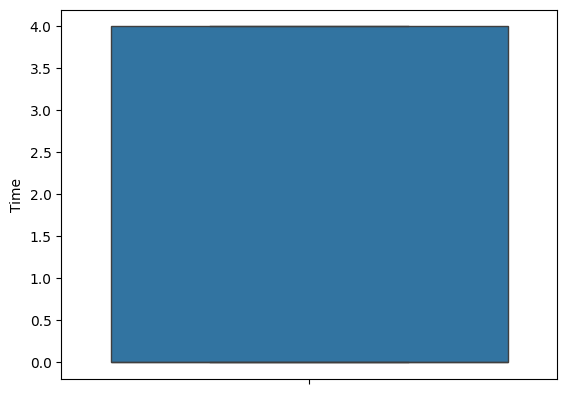

In [95]:
sns.boxplot(park_assign_1['Time'])
plt.show()


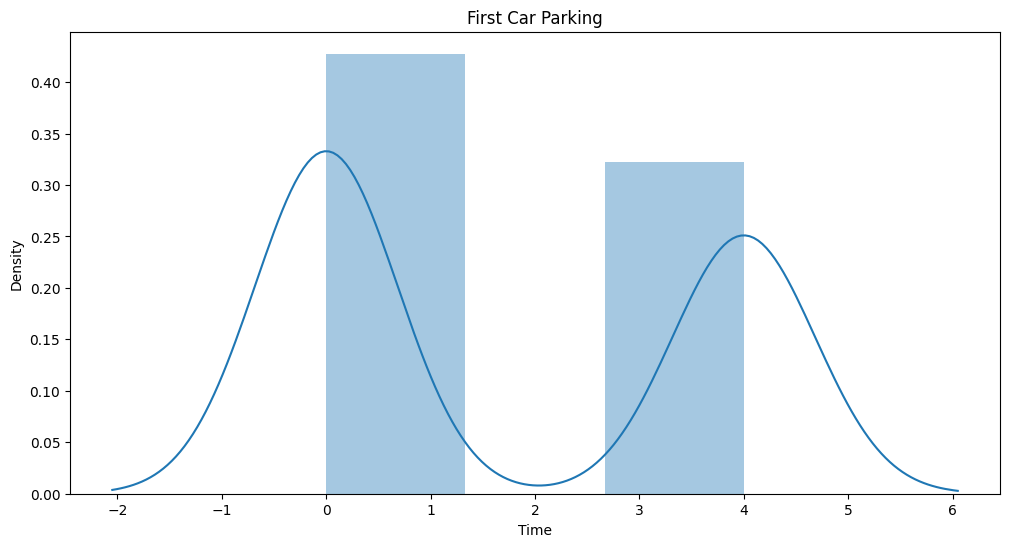

In [96]:
plt.figure(figsize=(12,6))
sns.distplot(park_assign_1['Time'])
plt.title("First Car Parking")
plt.show()

## Iteration 2


In [87]:
# Let's filter no 2 Parking for the flat data
flats_df_2 = new_flats_data[new_flats_data['Rank'] == 2]
flats_df_2 = flats_df_2.reset_index(drop='index')
print(flats_df_2.shape)
flats_df_2.head()

(208, 12)


,Time_To_Podium_1,Time_To_Podium_2,Time_To_Podium_3,Time_To_Podium_4,Time_To_Podium_5,Time_To_Podium_6,Time_To_Podium_7,Time_To_Podium_8,Time_To_Podium_9,Rank,unique_flat_no,key
0,26,24,22,20,18,16,14,12,10,2,2-C-1401,1
1,26,24,22,20,18,16,14,12,10,2,2-C-1402,1
2,26,24,22,20,18,16,14,12,10,2,2-C-1403,1
3,26,24,22,20,18,16,14,12,10,2,2-C-1404,1
4,28,26,24,22,20,18,16,14,12,2,2-C-1501,1


In [88]:
len(park_assign_1['Col'])

801

In [ ]:
print(parking_data.shape)
parking_data.head()

In [ ]:
# Drop the assign car parking from the dataset

cols_to_drop_1 = park_assign_1['Col'].values    
print(len(cols_to_drop_1))

In [ ]:
# Filter out columns that exist in parking_time_1
cols_to_drop_existing = []
for col in cols_to_drop_1:
    cols_to_drop_existing.append(parking_data.loc[col][0])

cols_to_drop_existing

In [ ]:
# Dropping existing columns

parking_time_2 = parking_data_transpose.drop(cols_to_drop_existing,axis=1,errors='ignore')
print(parking_time_2.shape)
parking_time_2

In [ ]:
parking_time_2 = parking_time_2.iloc[:,1:]
print(parking_time_2.shape)
parking_time_2

In [ ]:
flats_df_2.shape

In [ ]:
final_df_iter_2 = pd.merge(flats_df_2,parking_time_2,on='key',how='outer')
print(final_df_iter_2.shape)

final_df_iter_2.head()

In [ ]:
final_df_iter_2 = final_df_iter_2.drop(columns=['key','Rank'])
final_df_iter_2.head()

In [ ]:
podium_time_2 = final_df_iter_2.iloc[:,:10]
print(podium_time_2.shape)
podium_time_2.head()

In [ ]:
parking_time_2 = final_df_iter_2.iloc[:,10:]
print(parking_time_2.shape)
parking_time_2.head()

In [ ]:
print(parking_time_2.shape)
parking_time_2.info()

In [ ]:
for col in podium_time_2.columns:
    #print(col[-8:])
    for j in parking_time_2.columns:
        if col[-8:] == j[:8]:
            parking_time_2[j] += podium_time_2[col]
        else:
            pass
parking_time_2.head()

In [ ]:
parking_time_2.tail()

In [ ]:
parking_time_2 = parking_time_2.apply(pd.to_numeric)
parking_time_2.info()

In [ ]:
# Let' calculate the no of rows need to be added to convert parking_time_2 to square matrix

matrix_col_2 = parking_time_2.shape[1]
matrix_row_2 = parking_time_2.shape[0]

matrix_col_2-matrix_row_2

In [ ]:
zero_rows_2 = pd.DataFrame(np.zeros((matrix_col_2-matrix_row_2, matrix_col_2)), columns=parking_time_2.columns)
zero_rows_2.shape

In [ ]:
parking_time_2_matrix = pd.concat([parking_time_2,zero_rows_2],axis=0)
parking_time_2_matrix.shape

In [ ]:
parking_matrix_2 = parking_time_2_matrix.values
parking_matrix_2

In [ ]:
m = Munkres()
indexes_2 = m.compute(parking_matrix_2)
total =0 

data = []
for row, col in indexes_2:
    values = parking_matrix_2[row][col]
    total += values
    data.append((row,col,total))


park_assign_2 = pd.DataFrame(data, columns=['Row', 'Col', 'total'])
park_assign_2 = park_assign_2.loc[:207,:]
park_assign_2.head()

In [ ]:
park_assign_2['Rank'] = 2
park_assign_2.shape

In [ ]:
parking_time_2.shape

In [ ]:
parking_time_df_2 = parking_time_2.head(1).T.reset_index()
# Chnage the name of the column
parking_time_df_2.columns = ['Parking_space', 'total_time']

print(parking_time_df_2.shape)

parking_time_df_2.head()

In [ ]:
parkinglist_2 = []
totaltime_list_2 = []
for i in park_assign_2['Col']:
    parkinglist_2.append(parking_time_df_2.loc[i][0])
    totaltime_list_2.append(parking_time_df_2.loc[i][1])

# Convert the parkinglist and totaltime_list to df
parkingtime_df_2 = pd.DataFrame({'Parking_Space': parkinglist_2, 'Time': totaltime_list_2})
print(parkingtime_df_2.shape)
parkingtime_df_2.head()
    


In [ ]:

print(park_assign_2.shape)
print(parkingtime_df_2.shape)

park_assign_2 = pd.merge(park_assign_2, parkingtime_df_2,left_index=True, right_index=True)
print(park_assign_2.shape)
park_assign_2.head(10)



In [ ]:
park_assign_2 = park_assign_2.drop(columns=['Rank','total'])
park_assign_2['Rank'] = 2
#park_assign_2_df = park_assign_2_df.rename(columns={'totaltime_list':'time'})
print(park_assign_2.shape)
park_assign_2.head()

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(park_assign_2['Time'])
plt.title("Second Car Parking")
plt.show()

In [ ]:
# Set up the figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first boxplot on the left subplot
sns.boxplot(x=None, y='Time', data=park_assign_1, ax=axes[0])
axes[0].set_title('first Car Parking')

# Plot the second boxplot on the right subplot
sns.boxplot(x=None, y='Time', data=park_assign_2, ax=axes[1])
axes[1].set_title('Second Car Parking')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Set up the figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first boxplot on the left subplot
sns.distplot(park_assign_1['Time'], ax=axes[0])
axes[0].set_title('first Car Parking')

# Plot the second boxplot on the right subplot
sns.distplot(park_assign_2['Time'], ax=axes[1])
axes[1].set_title('Second Car Parking')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plot
plt.show()


## Iteration 3


In [ ]:
# Let's filter no 2 parking for the flats data 
flats_df_3 = new_flats_data[new_flats_data['Rank'] == 3]
flats_df_3 = flats_df_3.reset_index(drop='index')
flats_df_3.head()

In [ ]:
len(park_assign_2['Col'])
park_assign_2.head()

In [ ]:
parking_time_3 = parking_time_2.head(1).T.reset_index()
parking_time_3 = parking_time_3.rename(columns={"index": "Parking_Slot", 0: "Totaltime"})
parking_time_3.head()


In [ ]:
# Drop the assign car parking from the dataset
cols_to_drop_2 = park_assign_2['Col'].values
print(len(cols_to_drop_2))

In [ ]:
# Filter out columns that exist in parking_time_1 & parking_time_2

cols_to_drop_existing_2 = []
for col in cols_to_drop_2:
    cols_to_drop_existing_2.append(parking_time_3.loc[col][0])
    
print(len(cols_to_drop_existing_2))
print(cols_to_drop_existing_2)



In [ ]:
parking_time_3 = parking_time_2.head(1)
parking_time_3 = parking_time_3.drop(cols_to_drop_existing_2, axis=1,errors='ignore')
parking_time_3['key'] = 1
print(parking_time_3.shape)
parking_time_3

In [ ]:
flats_df_3.shape

In [ ]:
final_df_iter_3 = pd.merge(flats_df_3, parking_time_3, on='key', how='outer')
print(final_df_iter_3.shape)

final_df_iter_3.head()

In [ ]:
final_df_iter_3 = final_df_iter_3.drop(columns=['key','Rank'])
final_df_iter_3.head()

In [ ]:
podium_time_3 = final_df_iter_3.iloc[:,:10]
print(podium_time_3.shape)
podium_time_3.head()

In [ ]:
parking_time_3 = final_df_iter_3.iloc[:,10:]
print(parking_time_3.shape)
parking_time_3.head()

In [ ]:
print(parking_time_3.shape)
parking_time_3.info()

In [ ]:
for col in podium_time_3.columns:
    #print(col[-8:])
    for j in parking_time_3.columns:
        if col[-8:] == j[:8]:
            parking_time_3[j] += podium_time_3[col]
        else:
            pass
parking_time_3.head()

In [ ]:
parking_time_3.tail()

In [ ]:
parking_time_3 = parking_time_3.apply(pd.to_numeric)
parking_time_3.info()

In [ ]:
# Let' calculate the no of rows need to be added to convert parking_time_2 to square matrix

matrix_col_3 = parking_time_3.shape[1]
matrix_row_3 = parking_time_3.shape[0]

matrix_col_2-matrix_row_2

In [ ]:
zero_rows_3 = pd.DataFrame(np.zeros((matrix_col_3-matrix_row_3, matrix_col_3)), columns=parking_time_3.columns)
zero_rows_3.shape

In [ ]:
parking_time_3_matrix = pd.concat([parking_time_3,zero_rows_3],axis=0)
parking_time_3_matrix.shape

In [ ]:
parking_matrix_3 = parking_time_3_matrix.values
parking_matrix_3

In [ ]:
iter3 = parking_time_3.shape[0]-1

In [ ]:
m = Munkres()
indexes_3 = m.compute(parking_matrix_3)
total =0 

data = []
for row, col in indexes_3:
    values = parking_matrix_3[row][col]
    total += values
    data.append((row,col,total))


park_assign_3 = pd.DataFrame(data, columns=['Row', 'Col', 'total'])
park_assign_3 = park_assign_3.loc[:iter3,:]
park_assign_3.head()

In [ ]:
park_assign_3['Rank'] = 1
park_assign_3.shape

In [ ]:
parking_time_3.shape

In [ ]:
parking_time_df_3 = parking_time_3.head(1).T.reset_index()
# Chnage the name of the column
parking_time_df_3.columns = ['Parking_space', 'total_time']

print(parking_time_df_3.shape)

parking_time_df_3.head()

In [ ]:
parkinglist_3 = []
totaltime_list_3 = []
for i in park_assign_3['Col']:
    parkinglist_3.append(parking_time_df_3.loc[i][0])
    totaltime_list_3.append(parking_time_df_3.loc[i][1])

# Convert the parkinglist and totaltime_list to df
parkingtime_df_3 = pd.DataFrame({'Parking_Space': parkinglist_3, 'Time': totaltime_list_3})
print(parkingtime_df_3.shape)
parkingtime_df_3.head()
    


In [ ]:

print(park_assign_3.shape)
print(parkingtime_df_3.shape)

park_assign_3 = pd.merge(park_assign_3, parkingtime_df_3,left_index=True, right_index=True)
print(park_assign_3.shape)
park_assign_3.head(10)



In [ ]:
park_assign_3 = park_assign_3.drop(columns=['Rank','total'])
park_assign_3['Rank'] = 3

print(park_assign_3.shape)
park_assign_3.head()

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(park_assign_3['Time'])
plt.title("Second Car Parking")
plt.show()

In [ ]:
# Set up the figure with two subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# Plot the first boxplot on the left subplot
sns.boxplot(x=None, y='Time', data=park_assign_1, ax=axes[0])
axes[0].set_title('first Car Parking')

# Plot the second boxplot on the right subplot
sns.boxplot(x=None, y='Time', data=park_assign_2, ax=axes[1])
axes[1].set_title('Second Car Parking')

# Plot the third boxplot on the right subplot
sns.boxplot(x=None, y='Time', data=park_assign_3, ax=axes[2])
axes[2].set_title('Third Car Parking')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
 # Set up the figure with two subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# Plot the first boxplot on the left subplot
sns.distplot(park_assign_1['Time'], ax=axes[0])
axes[0].set_title('first Car Parking')

# Plot the second boxplot on the right subplot
sns.distplot(park_assign_2['Time'], ax=axes[1])
axes[1].set_title('Second Car Parking')

# Plot the third boxplot on the right subplot
sns.distplot(park_assign_3['Time'], ax=axes[2])
axes[2].set_title('Third Car Parking')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
sns.boxplot(park_assign_1['Time'])
sns.boxplot(park_assign_2['Time'])
sns.boxplot(park_assign_3['Time'])

In [ ]:
park_assign_1.columns,park_assign_2.columns,park_assign_3.columns

In [ ]:
flats_df_2

In [97]:
for i in park_assign_1['Row']:
    park_assign_1['Row'][i] = flats_df_1['unique_flat_no'][i]
park_assign_1.head()


    

,Row,Col,Parking_Space,Time,Rank
0,1-C-1401,547,Podium_3-14,0,1
1,1-C-1402,546,Podium_3-13,0,1
2,1-C-1403,545,Podium_3-12,0,1
3,1-C-1404,544,Podium_3-11,0,1
4,1-C-1501,543,Podium_3-10,0,1


In [ ]:
for j in park_assign_2['Row']:
    park_assign_2['Row'][j] = flats_df_2['unique_flat_no'][j]
park_assign_2.head()


In [ ]:
for i in park_assign_3['Row']:
    park_assign_3['Row'][i] = flats_df_3['unique_flat_no'][i]
park_assign_3.head()


In [ ]:
park_assign_1.columns,park_assign_2.columns,park_assign_3.columns

In [ ]:
concatenated_df = pd.concat([park_assign_1, park_assign_2, park_assign_3])
concatenated_df

In [ ]:
sns.boxplot(data=concatenated_df, x="Rank", y="Time")
plt.show()

In [100]:
parking_time_1.head(1)

,Podium_2-1,Podium_2-2,Podium_2-3,Podium_2-4,Podium_2-5,Podium_2-6,Podium_2-7,Podium_2-8,Podium_2-9,Podium_2-10,Podium_2-11,Podium_2-12,Podium_2-13,Podium_2-14,Podium_2-15,Podium_2-16,Podium_2-17,Podium_2-18,Podium_2-19,Podium_2-20,Podium_2-21,Podium_2-22,Podium_2-23,Podium_2-24,Podium_2-25,Podium_2-26,Podium_2-27,Podium_2-28,Podium_2-29,Podium_2-30,Podium_2-31,Podium_2-32,Podium_2-33,Podium_2-34,Podium_2-35,Podium_2-36,Podium_2-37,Podium_2-38,Podium_2-39,Podium_2-40,Podium_2-41,Podium_2-42,Podium_2-43,Podium_2-44,Podium_2-45,Podium_2-46,Podium_2-47,Podium_2-48,Podium_2-49,Podium_2-50,Podium_2-51,Podium_2-52,Podium_2-53,Podium_2-54,Podium_2-55,Podium_2-56,Podium_2-57,Podium_2-58,Podium_2-59,Podium_2-60,Podium_2-61,Podium_2-62,Podium_2-63,Podium_2-64,Podium_2-65,Podium_2-66,Podium_2-67,Podium_2-68,Podium_2-69,Podium_2-70,Podium_2-71,Podium_2-72,Podium_2-73,Podium_2-74,Podium_2-75,Podium_2-76,Podium_2-77,Podium_2-78,Podium_2-79,Podium_2-80,Podium_2-81,Podium_2-82,Podium_2-83,Podium_2-84,Podium_2-85,Podium_2-86,Podium_2-87,Podium_2-88,Podium_2-89,Podium_4-1,Podium_4-2,Podium_4-3,Podium_4-4,Podium_4-5,Podium_4-6,Podium_4-7,Podium_4-8,Podium_4-9,Podium_4-10,Podium_4-11,Podium_4-12,Podium_4-13,Podium_4-14,Podium_4-15,Podium_4-16,Podium_4-17,Podium_4-18,Podium_4-19,Podium_4-20,Podium_4-21,Podium_4-22,Podium_4-23,Podium_4-24,Podium_4-25,Podium_4-26,Podium_4-27,Podium_4-28,Podium_4-29,Podium_4-30,Podium_4-31,Podium_4-32,Podium_4-33,Podium_4-34,Podium_4-35,Podium_4-36,Podium_4-37,Podium_4-38,Podium_4-39,Podium_4-40,Podium_4-41,Podium_4-42,Podium_4-43,Podium_4-44,Podium_4-45,Podium_4-46,Podium_4-47,Podium_4-48,Podium_4-49,Podium_4-50,Podium_4-51,Podium_4-52,Podium_4-53,Podium_4-54,Podium_4-55,Podium_4-56,Podium_4-57,Podium_4-58,Podium_4-59,Podium_4-60,Podium_4-61,Podium_4-62,Podium_4-63,Podium_4-64,Podium_4-65,Podium_4-66,Podium_4-67,Podium_4-68,Podium_4-69,Podium_4-70,Podium_4-71,Podium_4-72,Podium_4-73,Podium_4-74,Podium_4-75,Podium_4-76,Podium_4-77,Podium_4-78,Podium_4-79,Podium_4-80,Podium_4-81,Podium_4-82,Podium_4-83,Podium_4-84,Podium_4-85,Podium_4-86,Podium_4-87,Podium_4-88,Podium_4-89,Podium_5-1,Podium_5-2,Podium_5-3,Podium_5-4,Podium_5-5,Podium_5-6,Podium_5-7,Podium_5-8,Podium_5-9,Podium_5-10,Podium_5-11,Podium_5-12,Podium_5-13,Podium_5-14,Podium_5-15,Podium_5-16,Podium_5-17,Podium_5-18,Podium_5-19,Podium_5-20,Podium_5-21,Podium_5-22,Podium_5-23,Podium_5-24,Podium_5-25,Podium_5-26,Podium_5-27,Podium_5-28,Podium_5-29,Podium_5-30,Podium_5-31,Podium_5-32,Podium_5-33,Podium_5-34,Podium_5-35,Podium_5-36,Podium_5-37,Podium_5-38,Podium_5-39,Podium_5-40,Podium_5-41,Podium_5-42,Podium_5-43,Podium_5-44,Podium_5-45,Podium_5-46,Podium_5-47,Podium_5-48,Podium_5-49,Podium_5-50,Podium_5-51,Podium_5-52,Podium_5-53,Podium_5-54,Podium_5-55,Podium_5-56,Podium_5-57,Podium_5-58,Podium_5-59,Podium_5-60,Podium_5-61,Podium_5-62,Podium_5-63,Podium_5-64,Podium_5-65,Podium_5-66,Podium_5-67,Podium_5-68,Podium_5-69,Podium_5-70,Podium_5-71,Podium_5-72,Podium_5-73,Podium_5-74,Podium_5-75,Podium_5-76,Podium_5-77,Podium_5-78,Podium_5-79,Podium_5-80,Podium_5-81,Podium_5-82,Podium_5-83,Podium_5-84,Podium_5-85,Podium_5-86,Podium_5-87,Podium_5-88,Podium_5-89,Podium_6-1,Podium_6-2,Podium_6-3,Podium_6-4,Podium_6-5,Podium_6-6,Podium_6-7,Podium_6-8,Podium_6-9,Podium_6-10,Podium_6-11,Podium_6-12,Podium_6-13,Podium_6-14,Podium_6-15,Podium_6-16,Podium_6-17,Podium_6-18,Podium_6-19,Podium_6-20,Podium_6-21,Podium_6-22,Podium_6-23,Podium_6-24,Podium_6-25,Podium_6-26,Podium_6-27,Podium_6-28,Podium_6-29,Podium_6-30,Podium_6-31,Podium_6-32,Podium_6-33,Podium_6-34,Podium_6-35,Podium_6-36,Podium_6-37,Podium_6-38,Podium_6-39,Podium_6-40,Podium_6-41,Podium_6-42,Podium_6-43,Podium_6-44,Podium_6-45,Podium_6-46,Podium_6-47,Podium_6-48,Podium_6-49,Podium_6-50,Podium_6-51,Podium_6-52,Podium_6-53,Podium_6-54,Podium_6-55,Podium_6-56,Podium_6-57,Podium_6-58,Podium_6-59,Podium_6-60,Podium_6-61,Podium_6-62,Podium_6-63,Podium_6-64,Podium_6-65,Podium_6-66,Podium_6-67,Podium_6-68,Podium_6-69,Pod